array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

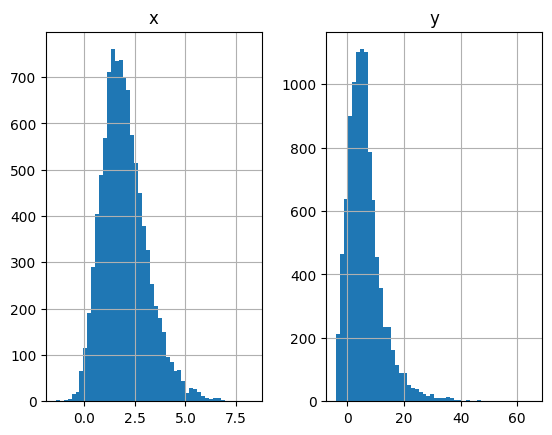

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

N=10**4
normal=np.random.normal(size=(N,1))
gamma=np.random.gamma(shape=4,size=(N,1))
x=0.5*normal+0.5*gamma
y=x**2+1+np.random.uniform(-5,5,(N,1))
df=pd.DataFrame(np.concatenate((x,y),axis=1),columns=('x','y'))
df.hist(bins=50)

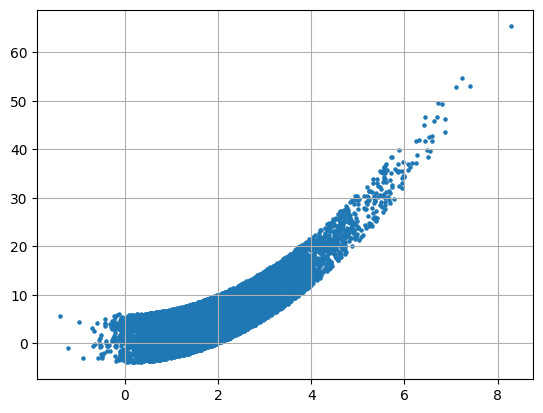

In [3]:
plt.scatter(df['x'],df['y'],s=5)
plt.grid()

In [5]:
#@title Ancho constante
bins=6
M=df['x'].max()
m=df['x'].min()
intervalo=(M-m)/bins
intervalo

1.6130021300877184

In [6]:
m,m+intervalo # límites del primer contenedor

(-1.3958592389751057, 0.21714289111261276)

In [8]:
m+intervalo,m+2*intervalo # límites del secondo

(0.21714289111261276, 1.8301450212003312)

In [9]:
# En general...
np.arange(m,M+intervalo,intervalo)

array([-1.39585924,  0.21714289,  1.83014502,  3.44314715,  5.05614928,
        6.66915141,  8.28215354])

In [12]:
limites=np.linspace(m,M,bins+1)
limites

array([-1.39585924,  0.21714289,  1.83014502,  3.44314715,  5.05614928,
        6.66915141,  8.28215354])

In [14]:
#pd.cut?

In [15]:
df['x_ancho']=pd.cut(df['x'],limites,include_lowest=True)
df.head()

,x,y,x_ancho
0,1.996585,9.431123,"(1.83, 3.443]"
1,3.394559,8.569245,"(1.83, 3.443]"
2,0.598909,-3.563563,"(0.217, 1.83]"
3,0.324570,2.697237,"(0.217, 1.83]"
4,1.514709,6.561506,"(0.217, 1.83]"


In [17]:
x=df.groupby('x_ancho')['x'].mean()
x

x_ancho
(-1.3969999999999998, 0.217]   -0.047390
(0.217, 1.83]                   1.180189
(1.83, 3.443]                   2.491820
(3.443, 5.056]                  4.012242
(5.056, 6.669]                  5.627608
(6.669, 8.282]                  7.106740
Name: x, dtype: float64

In [18]:
y=df.groupby('x_ancho')['y'].mean()
y

x_ancho
(-1.3969999999999998, 0.217]     1.121747
(0.217, 1.83]                    2.570144
(1.83, 3.443]                    7.407843
(3.443, 5.056]                  17.216827
(5.056, 6.669]                  32.447007
(6.669, 8.282]                  51.244175
Name: y, dtype: float64

In [21]:
lin_ancho=LinearRegression()
lin_ancho.fit(x.values.reshape(-1,1),y)

LinearRegression()

In [24]:
lin=LinearRegression()
lin.fit(df[['x']],df['y'])
predict_SD=lin.predict(df[['x']])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


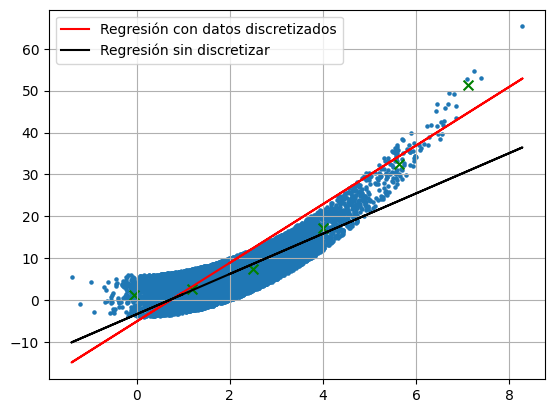

In [31]:
plt.scatter(df['x'],df['y'],s=5)
predict_ancho=lin_ancho.predict(df[['x']])
plt.plot(df['x'],predict_ancho,'r',label='Regresión con datos discretizados')
plt.plot(df['x'],predict_SD,'k',label='Regresión sin discretizar')
plt.scatter(x.values,y.values,marker='x',c='g',s=50)
plt.legend()
plt.grid()

In [32]:
df['x_ancho'].value_counts()

(0.217, 1.83]                   4590
(1.83, 3.443]                   4105
(3.443, 5.056]                   899
(-1.3969999999999998, 0.217]     277
(5.056, 6.669]                   120
(6.669, 8.282]                     9
Name: x_ancho, dtype: int64

In [33]:
#@title Frecuencia constante
bins=6
n_quantile=df['x'].shape[0]/bins
n_quantile

1666.6666666666667

In [36]:
pd.qcut?

In [37]:
df['x_freq'],limites_F=pd.qcut(df['x'],bins,retbins=True)
limites_F

array([-1.39585924,  0.95327564,  1.42865488,  1.86658415,  2.34596078,
        3.02046086,  8.28215354])

In [38]:
df['x_freq'].value_counts()

(-1.3969999999999998, 0.953]    1667
(0.953, 1.429]                  1667
(1.867, 2.346]                  1667
(3.02, 8.282]                   1667
(1.429, 1.867]                  1666
(2.346, 3.02]                   1666
Name: x_freq, dtype: int64

In [39]:
x_F=df.groupby('x_freq')['x'].mean()
x_F

x_freq
(-1.3969999999999998, 0.953]    0.534141
(0.953, 1.429]                  1.209586
(1.429, 1.867]                  1.646364
(1.867, 2.346]                  2.101792
(2.346, 3.02]                   2.655684
(3.02, 8.282]                   3.840101
Name: x, dtype: float64

In [40]:
y_F=df.groupby('x_freq')['y'].mean()
y_F

x_freq
(-1.3969999999999998, 0.953]     1.415873
(0.953, 1.429]                   2.390686
(1.429, 1.867]                   3.849477
(1.867, 2.346]                   5.352619
(2.346, 3.02]                    8.072481
(3.02, 8.282]                   16.328322
Name: y, dtype: float64

In [42]:
lin_freq=LinearRegression()
lin_freq.fit(x_F.values.reshape(-1,1),y_F)
predict_freq=lin_freq.predict(df[['x']])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


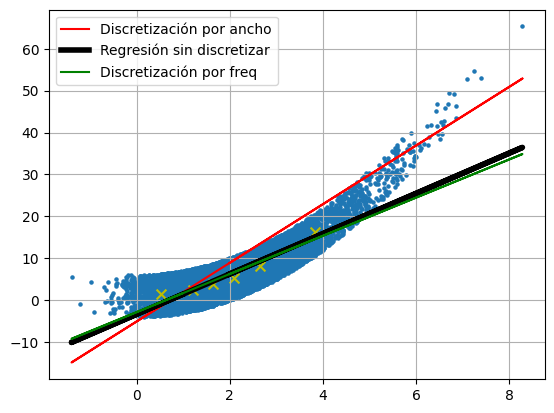

In [45]:
plt.scatter(df['x'],df['y'],s=5)
predict_ancho=lin_ancho.predict(df[['x']])
plt.plot(df['x'],predict_ancho,'r',label='Discretización por ancho')
plt.plot(df['x'],predict_SD,'k',label='Regresión sin discretizar',lw=4)
plt.scatter(x_F.values,y_F.values,marker='x',c='y',s=50)

plt.plot(df['x'],predict_freq,'g',label='Discretización por freq')
plt.legend()
plt.grid()

<Axes: >

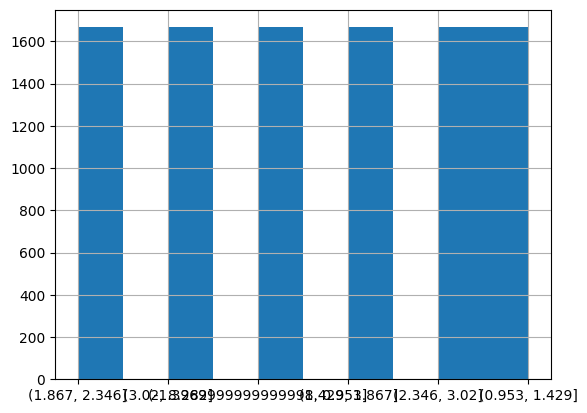

In [51]:
df['x_freq'].astype('string').hist()

<Axes: >

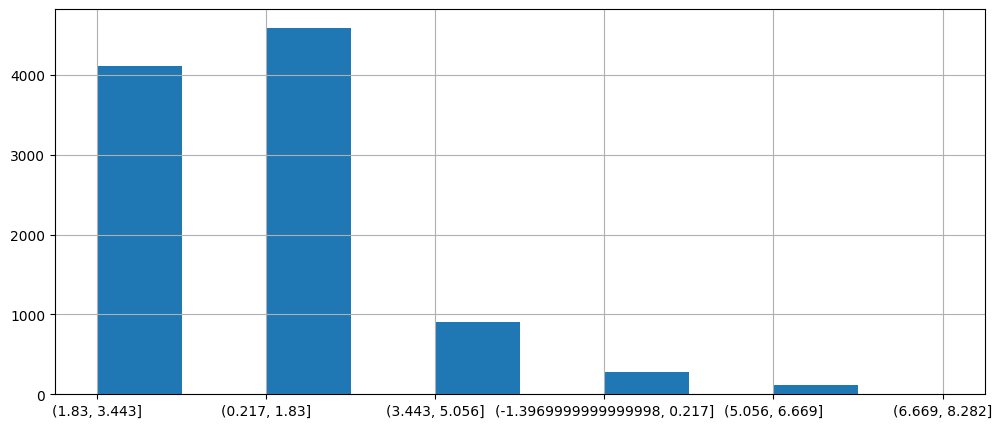

In [55]:
df['x_ancho'].astype('string').hist(figsize=(12,5))